In [1]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tqdm
name_list = ['olek_images0812',"lan_images620_1300", "marc_images35000_36200","vlad_images1011"]
log_name_list = ['monocap','monocap_w_o_gaussian_operate','monocap_w_o_gaussion_rot_scale','monocap_w_o_normal','monocap_w_o_gaussion_density_control','monocap_w_o_all']
iteration_list_list = [[2700,3200,2500,3200],[1200,1200,1200,1200],[2700,3000,2500,3200],[3200,2500,2500,3200],[2500,3000,2500,3200],[1200,1200,1200,1200]]

0it [00:00, ?it/s]

/home/zjlab1/workspace/Caixiang/GauHuman_ablation/output/zju_mocap_refine/my_olek_images0812_monocap/test/ours_2700/renders/*
/home/zjlab1/workspace/Caixiang/GauHuman_ablation/output/zju_mocap_refine/my_olek_images0812_monocap_w_o_gaussian_operate/test/ours_1200/renders/*
/home/zjlab1/workspace/Caixiang/GauHuman_ablation/output/zju_mocap_refine/my_olek_images0812_monocap_w_o_gaussion_rot_scale/test/ours_2700/renders/*
/home/zjlab1/workspace/Caixiang/GauHuman_ablation/output/zju_mocap_refine/my_olek_images0812_monocap_w_o_normal/test/ours_3200/renders/*
/home/zjlab1/workspace/Caixiang/GauHuman_ablation/output/zju_mocap_refine/my_olek_images0812_monocap_w_o_gaussion_density_control/test/ours_2500/renders/*
/home/zjlab1/workspace/Caixiang/GauHuman_ablation/output/zju_mocap_refine/my_olek_images0812_monocap_w_o_all/test/ours_1200/renders/*


  0%|          | 0/17 [00:00<?, ?it/s]
0it [00:00, ?it/s]


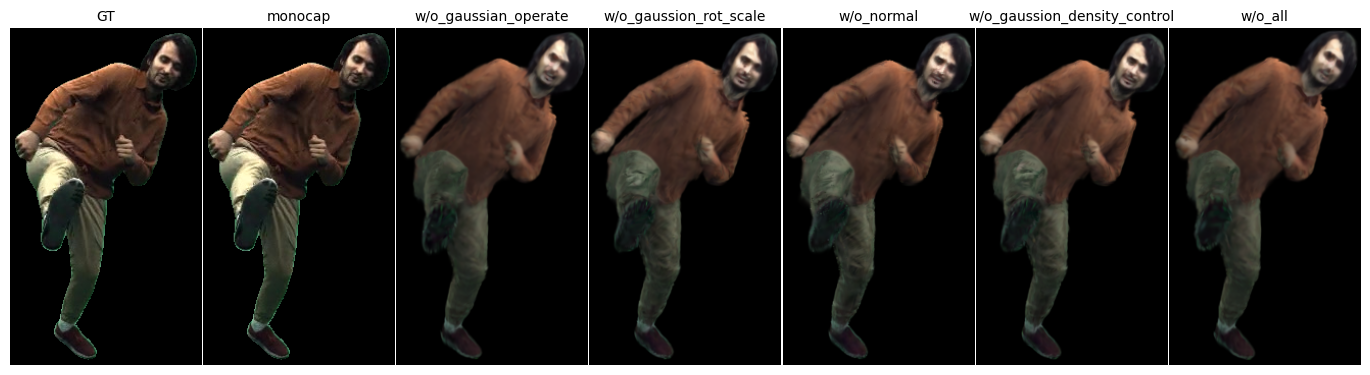

In [3]:
for idx,data_name in tqdm.tqdm(enumerate(name_list)):
    pred_list = []
    add_gt = True
    save_path = f'./ablation/{data_name}/'
    # os.makedirs(f'./ablation/{data_name}')
    for log_name,iteration_list in zip(log_name_list,iteration_list_list):
        iteration = iteration_list[idx]
        data_name = data_name
        exp_name=f'/home/zjlab1/workspace/Caixiang/GauHuman_ablation/output/zju_mocap_refine/my_{data_name}_{log_name}/test/ours_{iteration}/renders/*'
        print(exp_name)
        if add_gt:
            exp_name = exp_name.replace('renders','gt')
            renders_list = glob.glob(exp_name)
            pred_list.append(renders_list)
            add_gt = False
        renders_list = glob.glob(exp_name)
        pred_list.append(renders_list)

    txt_length = len(pred_list)
    for n in tqdm.tqdm(range(len(renders_list))):
        bound_mask = pred_list[0][n].replace('renders','depth')
        bound_mask = cv2.imread(bound_mask)
        img = cv2.cvtColor(bound_mask, cv2.COLOR_BGR2GRAY)
        _, bound_mask = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY)
        x, y, w, h = cv2.boundingRect(bound_mask)
        images = [cv2.imread(pred_list[i][n])[ y-5:y + h+5, x-5:x + w+5,:][:,:,::-1] for i in range(0, txt_length)]
        # import pdb
        # pdb.set_trace()
        # imgs = np.concatenate(images,axis=1)

        fig, axs = plt.subplots(1, len(pred_list), figsize=(15, 15))
        idx = 0
        temp_log_name_list = ['GT']+log_name_list
        for ax,log_name in zip(axs,temp_log_name_list):
            ax.imshow(images[idx])
            ax.axis('off')  # Hide axes
            ax.set_title(log_name.replace('monocap_w_o','w/o'), fontsize=10)  # Number below the image
            idx +=1
        # plt.tight_layout()
        plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.01, hspace=0.2)
        # print(imgs.shape)
        # cv2.imwrite(save_path+str(n)+'.jpg',imgs)
        plt.savefig(save_path+str(n)+'.pdf',dpi=300)
        break 
    break
        # plt.show()